In [8]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from torchvision import models
import pandas as pd

import torch
import matplotlib.pyplot as plt

def plot_weights_histogram(model, layer_name, figsize=(10, 6), n_bins=100):
    # Flatten the tensor to 1D and convert to numpy array
    data = model[layer_name].flatten().cpu().detach().numpy()

    # Create histogram
    plt.figure(figsize=(10, 6))
    plt.hist(data, bins=n_bins, color='salmon', alpha=0.7, edgecolor='black')

    # Add labels and title
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {path.split("/")[-2]}-{layer_name}')
    plt.grid(True, linestyle='--', alpha=0.5)

    # Show the plot
    plt.show()

def plot_layers_histogram(model, layer_names, model_name='Model', figsize=(25, 10), n_bins=50):
    # Create figure with subplots
    plt.figure(figsize=figsize)
    n_rows = 5
    n_cols = 3  # 2x7 grid for 14 layers
    
    for idx, layer_name in enumerate(layer_names, 1):
        # Get weights and convert to numpy
        weights = model[layer_name].flatten().cpu().detach().numpy()
        
        # Create subplot
        plt.subplot(n_rows, n_cols, idx)
        plt.hist(weights, bins=n_bins, color='salmon', alpha=0.7, edgecolor='black')
        
        # Subplot formatting
        plt.title(layer_name, fontsize=12)
        plt.grid(True, linestyle='--', alpha=0.5)
        plt.gca().tick_params(axis='both', which='major', labelsize=12)

    # Main figure formatting
    plt.tight_layout()
    plt.suptitle(f'Weight Distribution: {model_name}', y=1.02, fontsize=18)
    plt.savefig(f'figures/{model_name}_weight_distribution.png')
    plt.show()
    

Loading model:  rand-vgg16-cifar10-singleshot-lottery-c0.5-pre0-post100
Number of layers with weights:  14


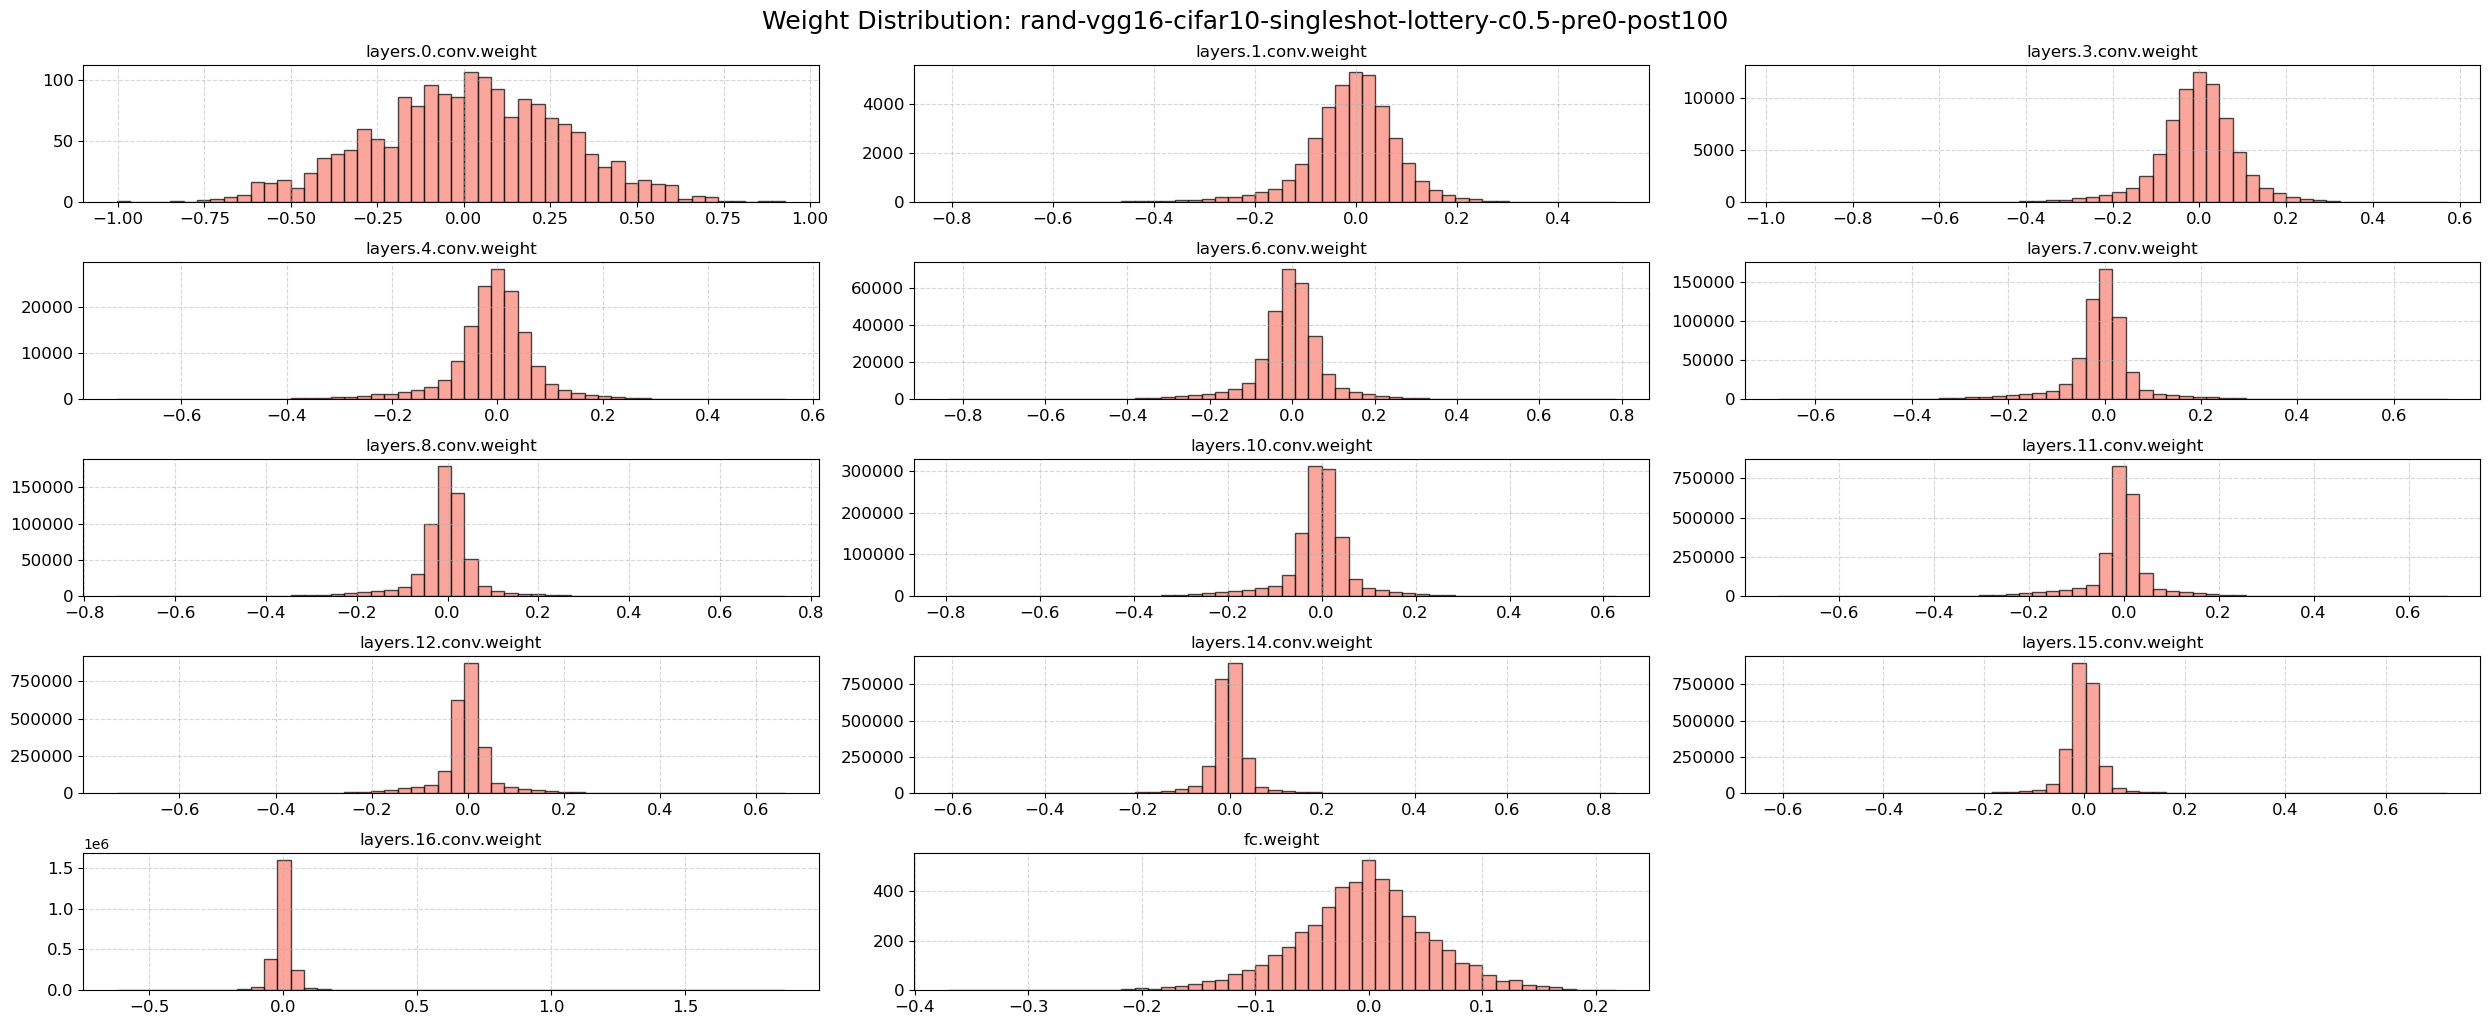

Loading model:  mag-vgg16-cifar10-singleshot-lottery-c0.5-pre200-post100
Number of layers with weights:  14


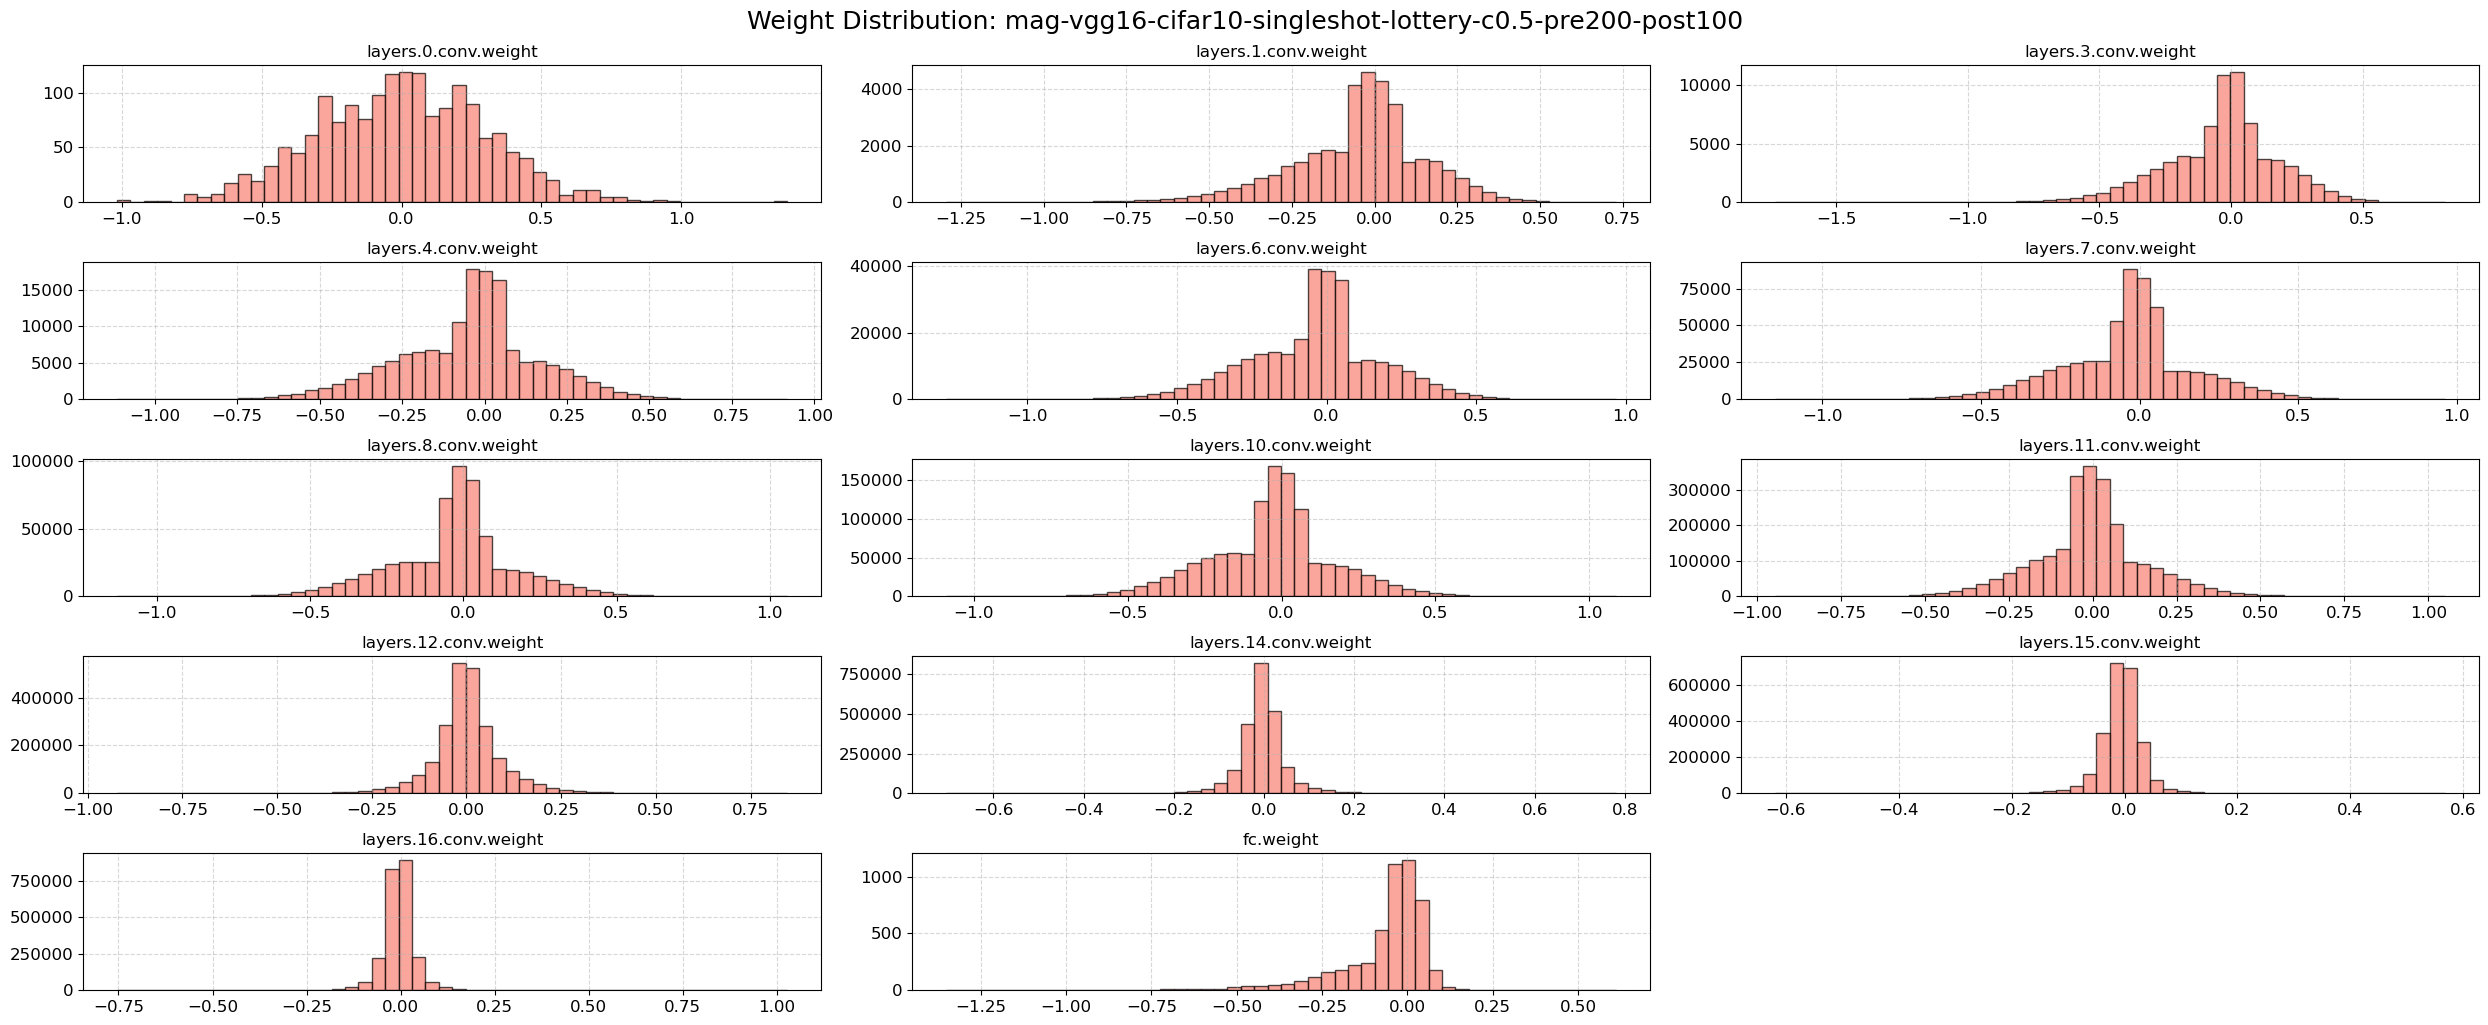

Loading model:  snip-vgg16-cifar10-singleshot-lottery-c0.5-pre0-post100
Number of layers with weights:  14


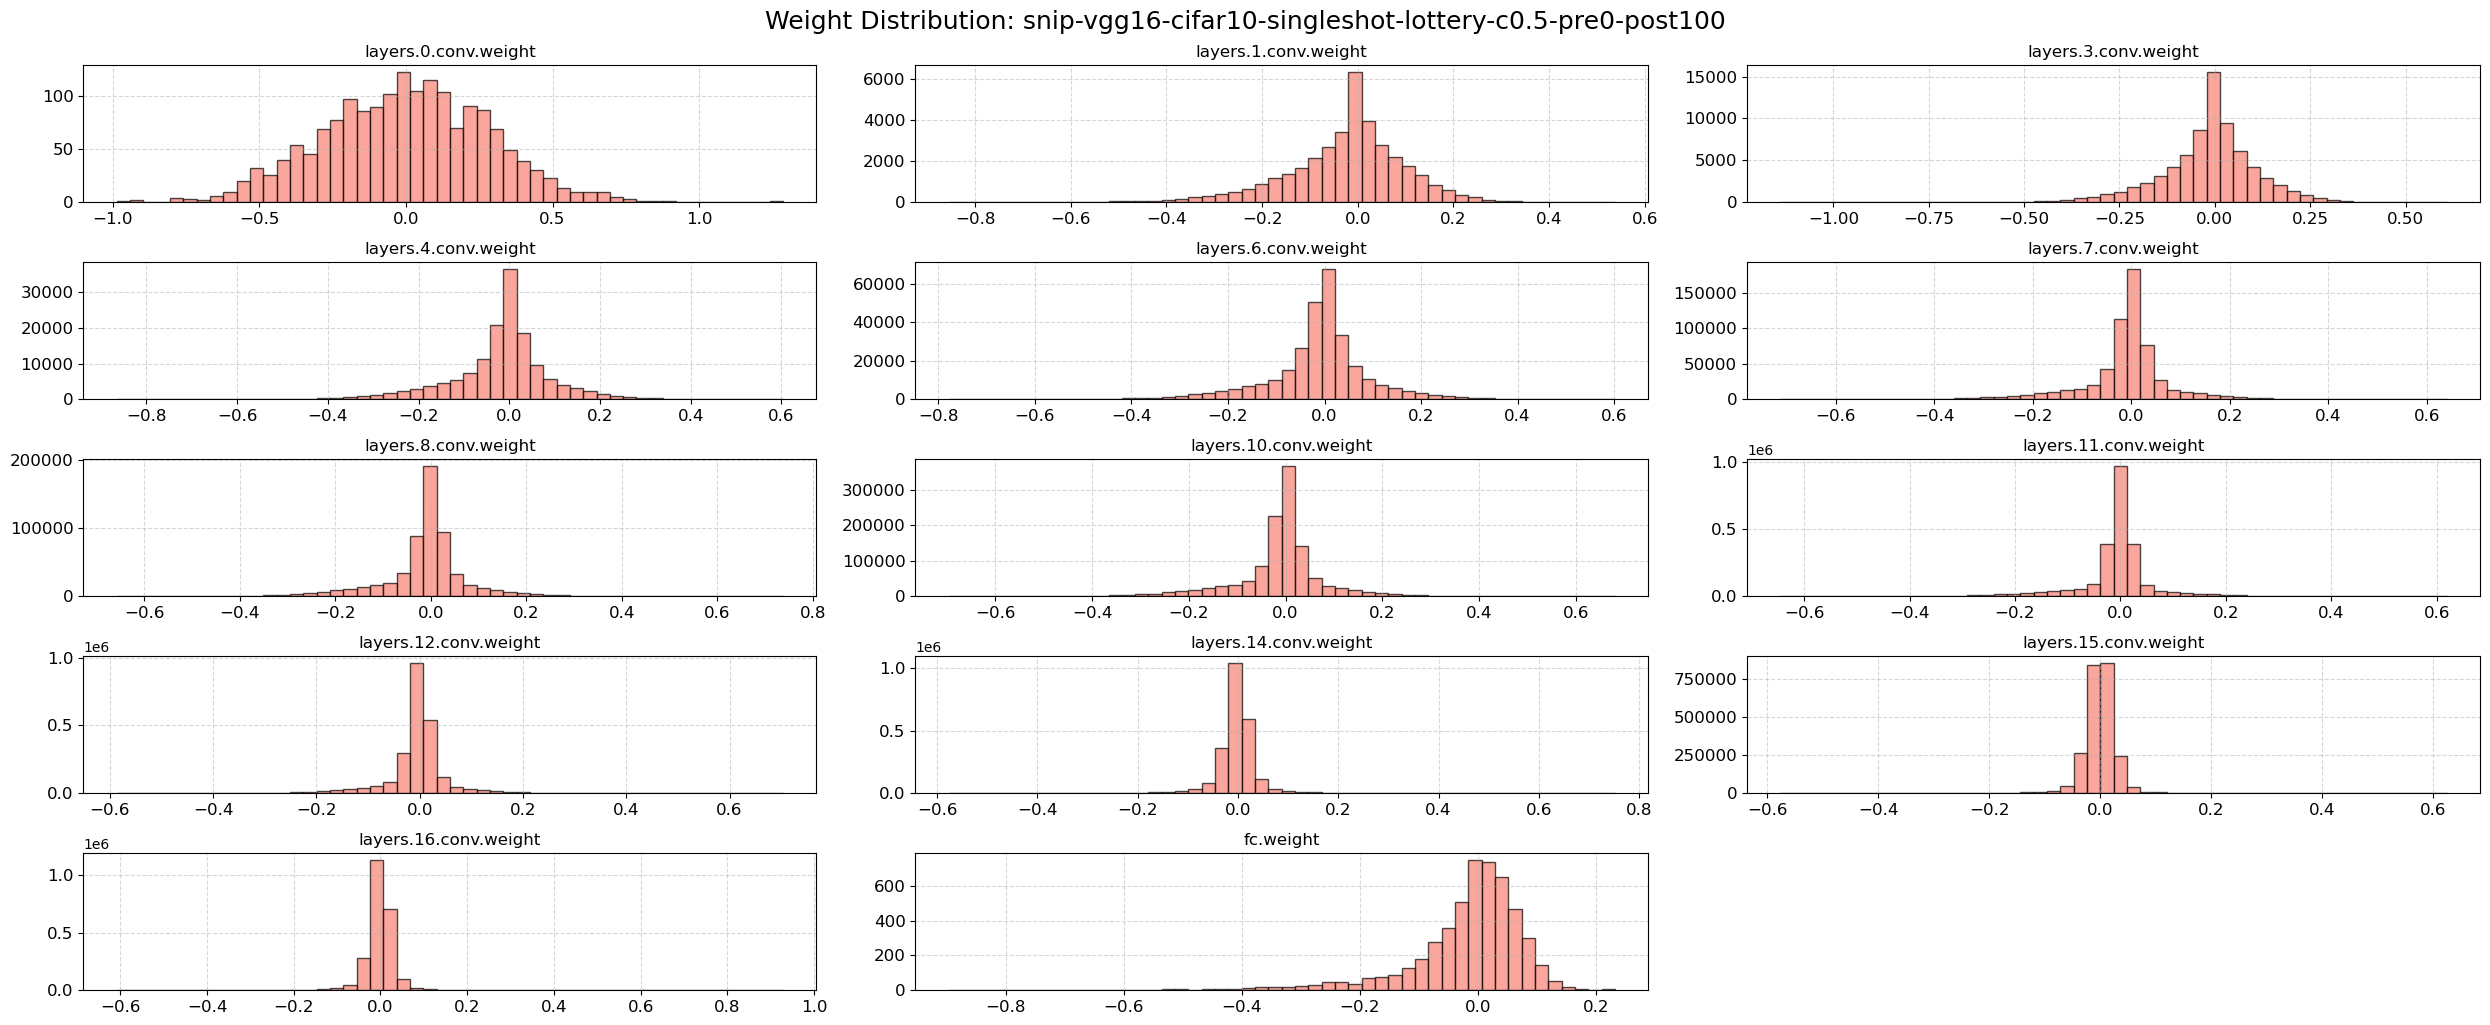

Loading model:  grasp-vgg16-cifar10-singleshot-lottery-c0.5-pre0-post100
Number of layers with weights:  14


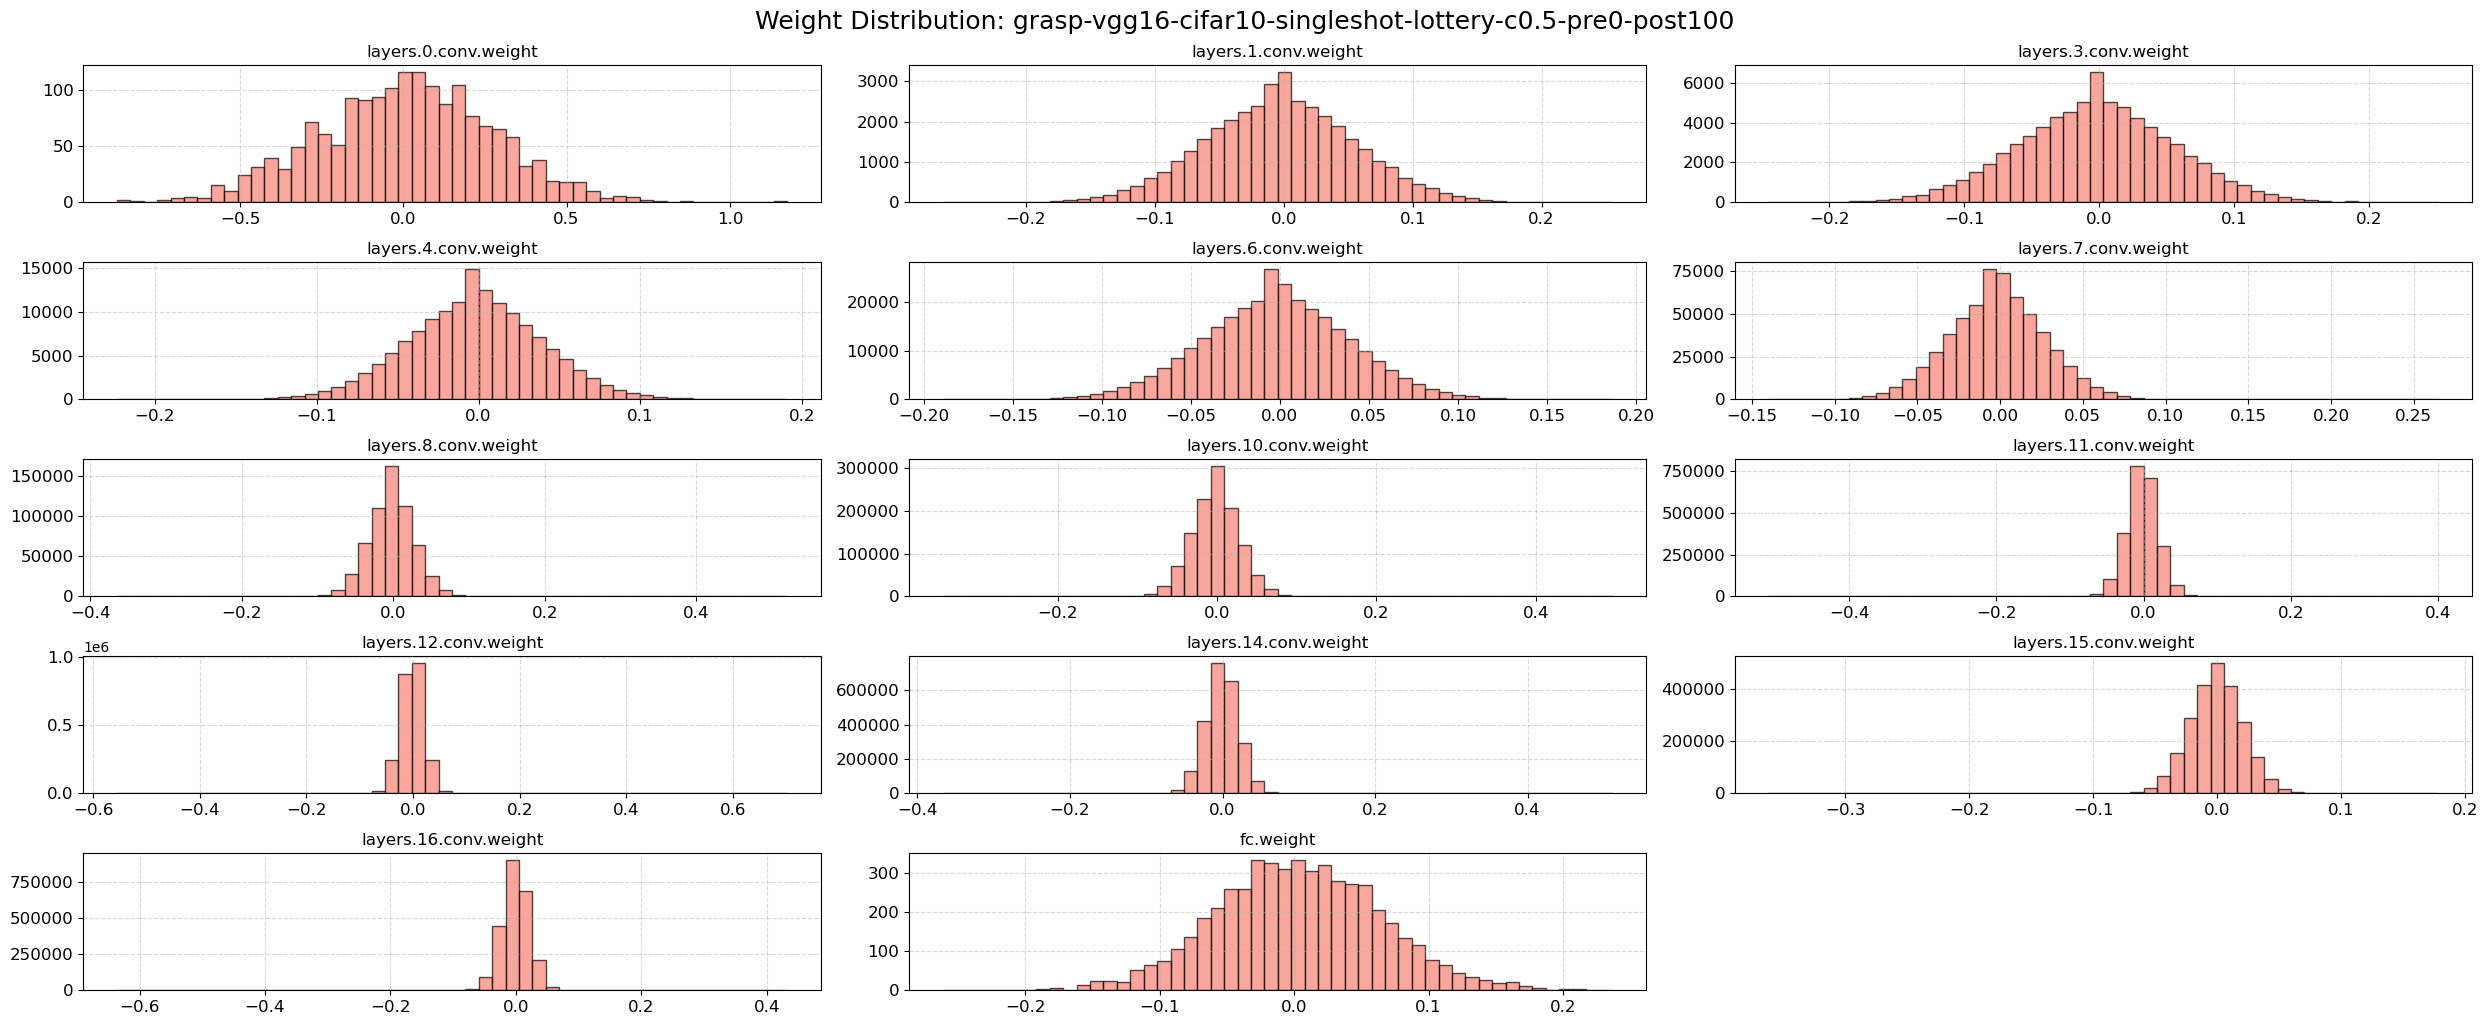

Loading model:  synflow-vgg16-cifar10-singleshot-lottery-c0.5-pre0-post100
Number of layers with weights:  14


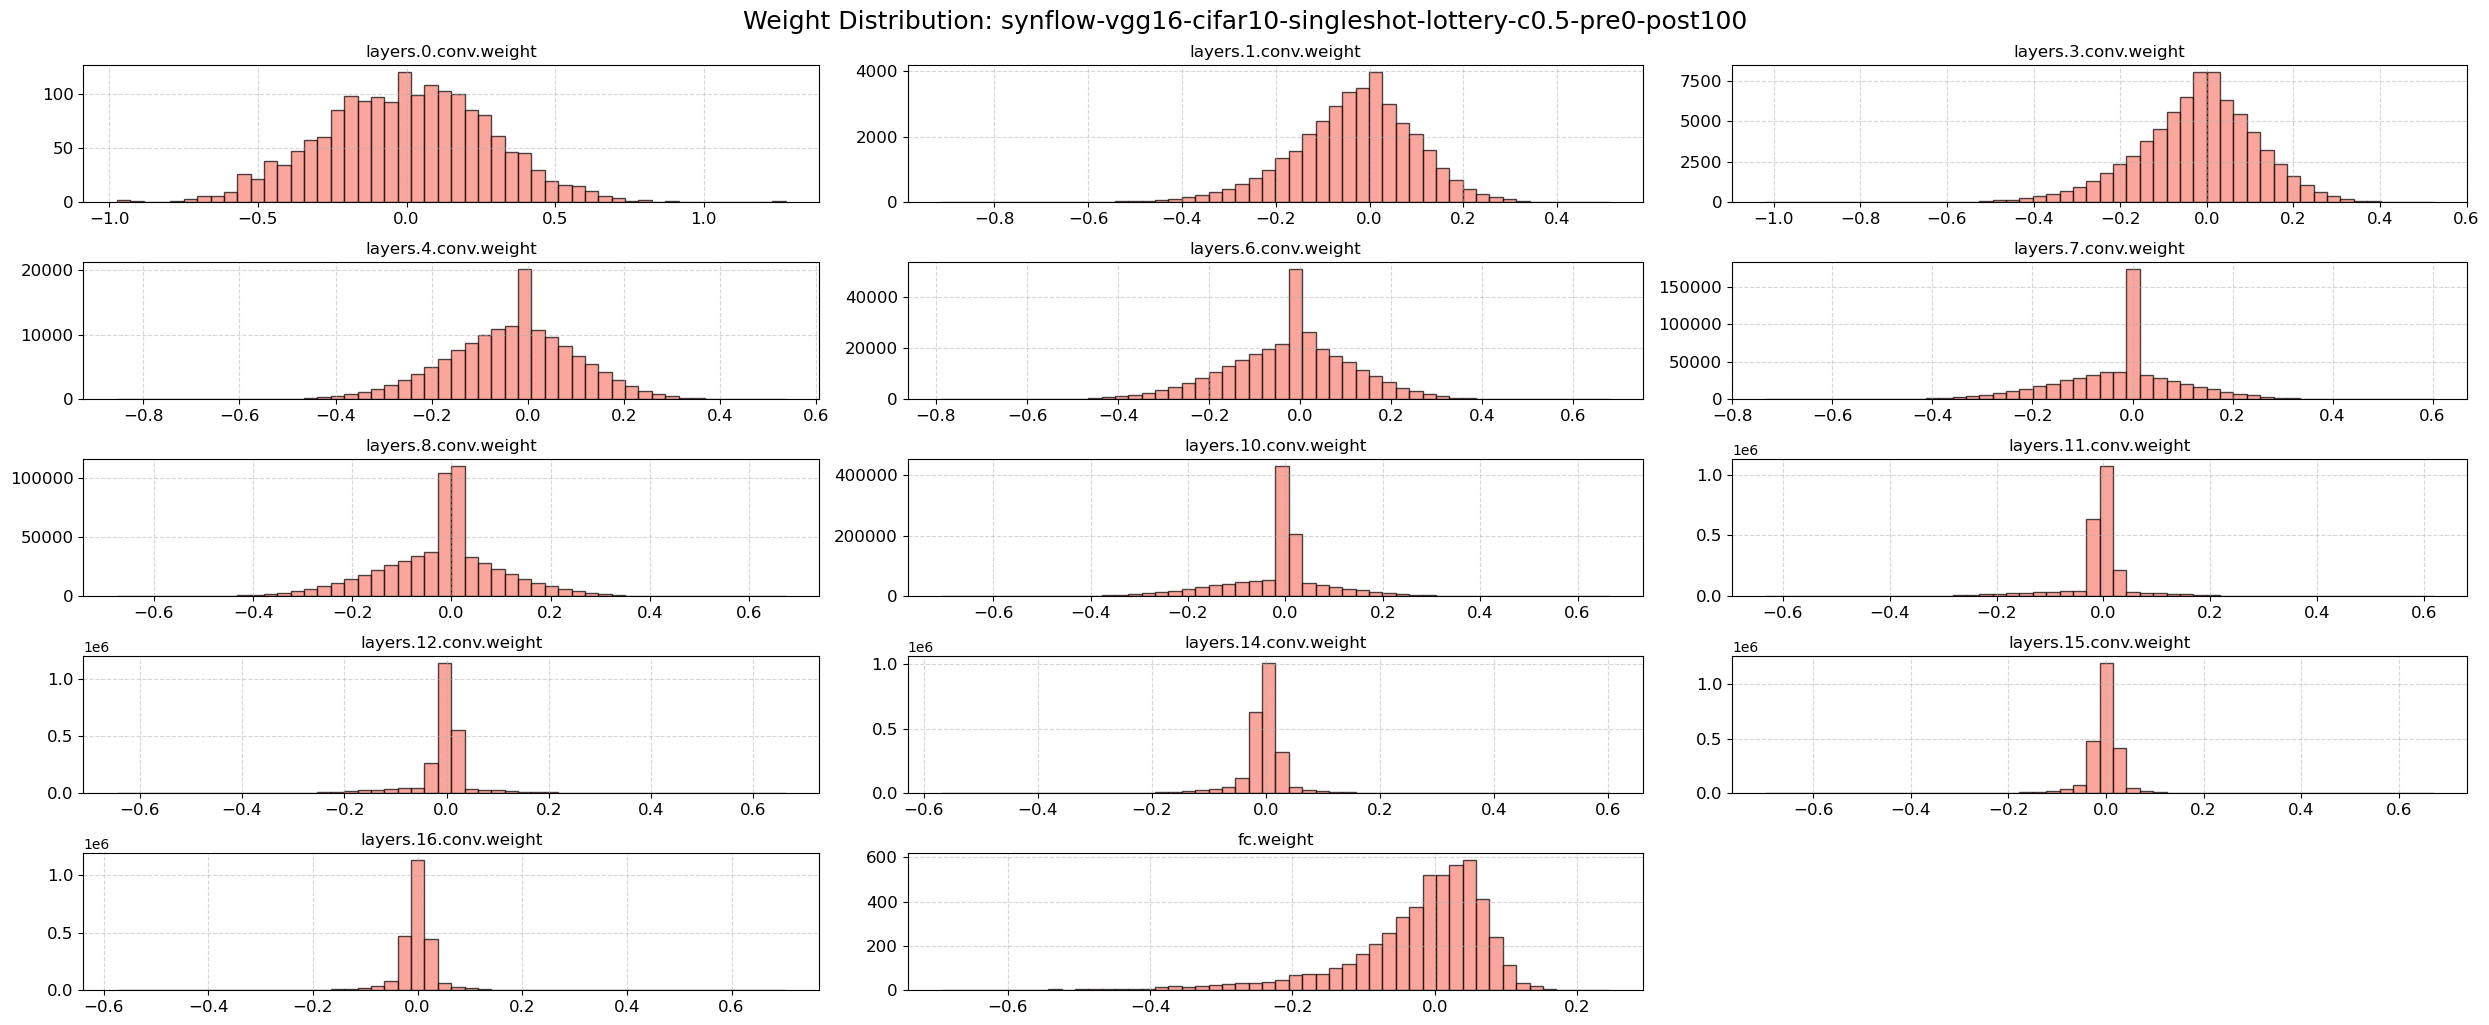

: 

In [ ]:
model_paths = [
    "/home/sl2998/workspace/COS568-Pruning-SP25/Results/data/singleshot/rand-vgg16-cifar10-singleshot-lottery-c0.5-pre0-post100/model.pt",
    "/home/sl2998/workspace/COS568-Pruning-SP25/Results/data/singleshot/mag-vgg16-cifar10-singleshot-lottery-c0.5-pre200-post100/model.pt",
    "/home/sl2998/workspace/COS568-Pruning-SP25/Results/data/singleshot/snip-vgg16-cifar10-singleshot-lottery-c0.5-pre0-post100/model.pt",
    "/home/sl2998/workspace/COS568-Pruning-SP25/Results/data/singleshot/grasp-vgg16-cifar10-singleshot-lottery-c0.5-pre0-post100/model.pt",
    "/home/sl2998/workspace/COS568-Pruning-SP25/Results/data/singleshot/synflow-vgg16-cifar10-singleshot-lottery-c0.5-pre0-post100/model.pt",
]

for path in model_paths:
    print("Loading model: ", path.split("/")[-2])
    
    model = torch.load(path, weights_only=False)
    layer_w_weights = [k for k in model.keys() if 'weight' in k and 'mask' not in k]
    print("Number of layers with weights: ", len(layer_w_weights))
    
    plot_layers_histogram(model, layer_w_weights, model_name=path.split("/")[-2])
    